In [10]:
import random
import time

import asyncio
import tqdm
import websockets
import numpy as np

from utils import get_true_images,generate_noised_images_list,calculate_prob,calc_prob_list,calc_partial_sum,sum_digits,generate_histogram

#### Generate digits for a given distribution(histogram)

In [2]:
t = 21
# distribution of digits in random_int_list(uniform)
histogram = [1/10 for i in range(10)]
random_int_list = np.random.choice(a=[0,1,2,3,4,5,6,7,8,9],size=t,p=histogram)
print("Generated random digits : ",random_int_list)
print("Corresponding histogram : ",histogram)

Generated random digits :  [3 8 4 1 7 1 4 1 3 0 3 2 6 7 3 6 9 8 8 7 0]
Corresponding histogram :  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


#### Convert digit to an image

In [3]:
# default width = 3, height = 5
width_scale = 100
height_scale = 40
# list, at which on a position i, array which represents i
int_to_image_list = (get_true_images(width_scale,height_scale))
# ethalon_matrices_list - each digit from random_int_list encoded into the corresponding matrix
ethalon_matrices_list = [int_to_image_list[random_int] for random_int in random_int_list]
print("Each image has a shape : ",ethalon_matrices_list[0].shape)

Each image has a shape :  (500, 120)


#### Add a noise

In [4]:
w, h = 5*width_scale,3*height_scale
p = 0.2
# adding noise to the 'ethalon_matrices_list'
noised_images = generate_noised_images_list(w,h,ethalon_matrices_list,p)
print("noised_images.shape :",noised_images[0].shape)
print("a length of noised_images :",len(noised_images))

noised_images.shape : (500, 120)
a length of noised_images : 21


###  (Not main code) Print the predicted and real digits in random_int_list

In [5]:
# change index
index_to_check = 2
### just run ###
for index_to_check in range(21):
    prob_max = 0
    index_ = 0
    for i in range(10):
        prob = calculate_prob(noised_images[index_to_check],int_to_image_list,histogram,i,p)
        #print(prob)
        if prob>prob_max:
            prob_max=prob
            index_ = i
    print("predicted, real digits : {}, {} ".format(index_,random_int_list[index_to_check]))

C:\krygin\lab3\utils.py:110: RuntimeWarning: overflow encountered in power
  result_sum += histogram[index_matrix]*((1-p)/p)**power_


predicted, real digits : 3, 3 
predicted, real digits : 8, 8 
predicted, real digits : 4, 4 
predicted, real digits : 1, 1 
predicted, real digits : 7, 7 
predicted, real digits : 1, 1 
predicted, real digits : 4, 4 
predicted, real digits : 1, 1 
predicted, real digits : 3, 3 
predicted, real digits : 0, 0 
predicted, real digits : 3, 3 
predicted, real digits : 2, 2 
predicted, real digits : 6, 6 
predicted, real digits : 7, 7 
predicted, real digits : 3, 3 
predicted, real digits : 6, 6 
predicted, real digits : 9, 9 
predicted, real digits : 8, 8 
predicted, real digits : 8, 8 
predicted, real digits : 7, 7 
predicted, real digits : 0, 0 


### Calculating the probabilities of all possible sum

In [6]:
start_time = time.time()
# up to 't' numbers calculate sum
for current_t in range(0,t):
    if current_t == 0 : 
        previous_probs_list = calc_prob_list(noised_images[0],int_to_image_list,histogram,p)
    else:
        next_probs_list = calc_prob_list(noised_images[current_t],int_to_image_list,histogram,p)
        previous_probs_list = calc_partial_sum(previous_probs_list,next_probs_list,current_t)
end_time = time.time()
print("elapsed time : ",end_time - start_time)

elapsed time :  0.7259166240692139


In [7]:
print("predicted sum : ",np.array(previous_probs_list).argmax())
print("real sum : ",np.sum(np.array(random_int_list[:t])).sum())

predicted sum :  91
real sum :  91


### Check is sum is divided by 3

In [8]:
prob_is_divided = 0
prob_is_not_divided = 0
for digits_sum,prob in enumerate(previous_probs_list):
    if digits_sum % 3 == 0:
        prob_is_divided += prob
    else :
        prob_is_not_divided += prob

if prob_is_divided > prob_is_not_divided:
    print("Our sum is divided by 3 without a residual")
else :
    print("Our sum is divided by 3 with a residual")

Our sum is divided by 3 with a residual


### Checking the trivial case(t=21) and p=0.5. amount of 1 and 0's are binomial

In [9]:
t = 21
# distribution of digits in random_int_list(uniform)
histogram = [0.5,0.5,0,0,0,0,0,0,0,0]
random_int_list = np.random.choice(a=[0,1,2,3,4,5,6,7,8,9],size=t,p=histogram)
print("Generated random digits : ",random_int_list)
print("Corresponding histogram : ",histogram)
p = 0.5
# adding noise to the 'ethalon_matrices_list'
noised_images = generate_noised_images_list(w,h,ethalon_matrices_list,p)
print("noised_images.shape :",noised_images[0].shape)
print("a length of noised_images :",len(noised_images))
#####
print("amount of 1 : ",noised_images[0][noised_images[0]==1].sum())
print("amount of 0 : ",w*h-noised_images[0][noised_images[0]==1].sum())
start_time = time.time()
# up to 't' numbers calculate sum
for current_t in range(0,t):
    if current_t == 0 : 
        previous_probs_list = calc_prob_list(noised_images[0],int_to_image_list,histogram,p)
    else:
        next_probs_list = calc_prob_list(noised_images[current_t],int_to_image_list,histogram,p)
        previous_probs_list = calc_partial_sum(previous_probs_list,next_probs_list,current_t)
end_time = time.time()
print("elapsed time : ",end_time - start_time)

Generated random digits :  [1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0]
Corresponding histogram :  [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
noised_images.shape : (500, 120)
a length of noised_images : 21
amount of 1 :  29934
amount of 0 :  30066
elapsed time :  0.7340350151062012


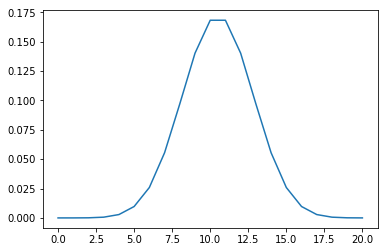

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.plot(np.arange(21),np.array(previous_probs_list[:21]))
plt.show()

### Check accuracy on sum and division on many iterations

In [19]:
width_scale = 10
height_scale = 40
# fixed parameters
int_to_image_list = (get_true_images(width_scale,height_scale))
w, h = 5*width_scale,3*height_scale
p = 0.2
###
right_ans_sum = 0
right_ans_div = 0
num_iterations = 100
for i in tqdm.tqdm(range(num_iterations)):
    t = 21
    histogram = generate_histogram(10)
    random_int_list = np.random.choice(a=[0,1,2,3,4,5,6,7,8,9],size=t,p=histogram)
    ethalon_matrices_list = [int_to_image_list[random_int] for random_int in random_int_list]
    noised_images = generate_noised_images_list(w,h,ethalon_matrices_list,p)
    for current_t in range(0,t):
        if current_t == 0 : 
            previous_probs_list = calc_prob_list(noised_images[0],int_to_image_list,histogram,p)
        else:
            next_probs_list = calc_prob_list(noised_images[current_t],int_to_image_list,histogram,p)
            previous_probs_list = calc_partial_sum(previous_probs_list,next_probs_list,current_t)
    if np.array(previous_probs_list).argmax() == np.sum(np.array(random_int_list[:t])).sum():
        right_ans_sum+=1
    
    prob_is_divided = 0
    prob_is_not_divided = 0
    isdivided = False
    for digits_sum,prob in enumerate(previous_probs_list):
        if digits_sum % 3 == 0:
            prob_is_divided += prob
        else :
            prob_is_not_divided += prob
    if prob_is_divided > prob_is_not_divided:
        isdivided = True
    if np.sum(np.array(random_int_list[:t])).sum()%3==0^isdivided:
        right_ans_div+=1
print("accuracy of sum = ",right_ans_sum/num_iterations)
print("accuracy of div = ",1 - right_ans_div/num_iterations)


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


accuracy of sum =  1.0
accuracy of div =  1.0
